<a href="https://colab.research.google.com/github/jiyeon712/B.D.A/blob/main/%EB%B3%B5%EC%8A%B5_%ED%95%9C%EC%A7%80%EC%97%B087_0107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

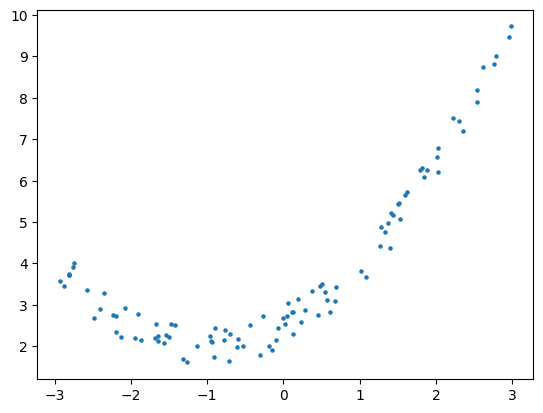

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False) # 기본 다항식형태를 만들고
x_poly = poly_features.fit_transform(x)
# 새롭게 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변형해준다.

In [ ]:
x[0], x_poly[0]

(array([0.38076508]), array([0.38076508, 0.14498204, 0.0552041 ]))

In [ ]:
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.

LinearRegression()

In [ ]:
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline

model_lr = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)

[[ 1.02867498  0.48644237 -0.00744552]]


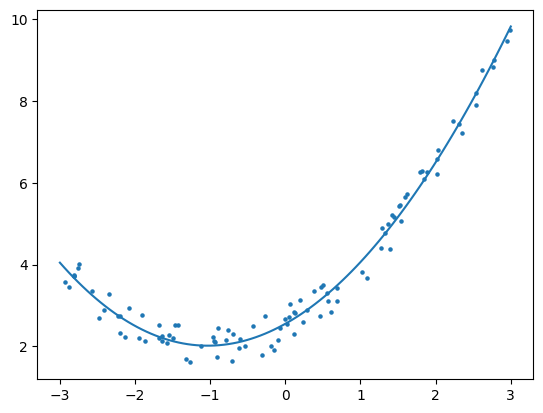

In [ ]:
# 다항회귀 그래프
xx = np.linspace(-3, 3, 100)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(x, y, s=5)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
boston = pd.read_csv('boston_house.csv')

In [ ]:
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


## RM 변수만 사용하여 Target과 비교할 예정!

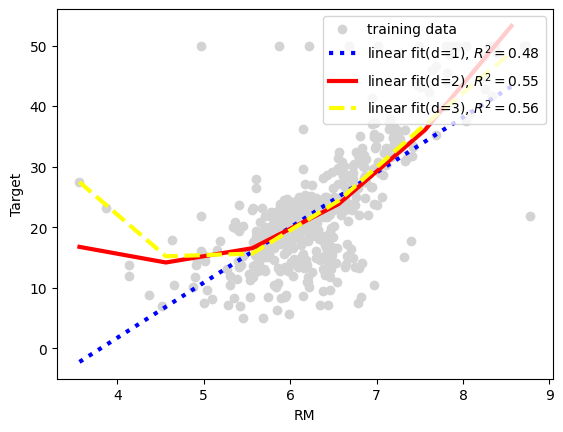

In [ ]:
X = np.array(boston['RM'])
y = np.array(boston['Target'])
X = X.reshape(-1,1)
y = y.reshape(-1,1)

lr = LinearRegression()

#다항회귀
quadrastic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadrastic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

##단순회귀식 계산
X_fit = np.arange(X.min(), X.max(), 1 )[:, np.newaxis]
lr.fit(X,y)
y_lin_fit = lr.predict(X_fit)
l_r2 = r2_score(y, lr.predict(X))

#2차 다항회귀 모델
lr.fit(X_quad,y)
y_quad_fit = lr.predict(quadrastic.fit_transform(X_fit))
q_r2 = r2_score(y, lr.predict(X_quad))

#3차 다항회귀 모델
lr.fit(X_cubic,y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
c_r2 = r2_score(y, lr.predict(X_cubic))

# 그래프 그리기
plt.scatter(X,y, label= 'training data', c = 'lightgray')
plt.plot(X_fit, y_lin_fit, linestyle = ':', label = 'linear fit(d=1), $R^2=%.2f$' %l_r2, c='blue',lw=3)
plt.plot(X_fit, y_quad_fit, linestyle = '-', label = 'linear fit(d=2), $R^2=%.2f$' %q_r2, c='red',lw=3)
plt.plot(X_fit, y_cubic_fit, linestyle = '--', label = 'linear fit(d=3), $R^2=%.2f$' %c_r2, c='yellow',lw=3)

plt.ylabel('Target')
plt.xlabel('RM')
plt.legend(loc=1)
plt.show()

In [ ]:
X = np.arange(4).reshape(2,2)
print('1차 단항식의 계수 피처 ',X)

# 2차 3차로 바뀌는 방식이 무엇인지를 이해해 보면
# 2차 다항식
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수',poly_ftr)

1차 단항식의 계수 피처  [[0 1]
 [2 3]]
변환된 2차 다항식 계수 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 단항식 X1, X2
- 2차 다항식으로 바꾸는 것은 기존의 단항식을 가지고 다항계수 변경하는 것
- [ 1, X1, X2, X1X2 , X2X1 X2X2 ]

## 규제를 통한 회귀 분석 예시 확인!